<a href="https://colab.research.google.com/github/ginomempin/machine-learning-tutorials/blob/master/src/DeepNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch
!pip3 install scikit-learn

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn

# Outline

1. Use `sklearn` to create the dataset
1. Use `torch` to create a Deep Neural Network
1. Train the NN so that it can classify the dataset into 2 classes

# Reference

[ginomempin / machine-learning-tutorials / docs / DeepNeuralNetworks.md](https://github.com/ginomempin/machine-learning-tutorials/blob/master/docs/DeepNeuralNetworks.md)

# Create the Data Set

This should be similar to the circular dataset from the tutorial:  
[DeepNeuralNetworks-5-Backpropagation-2.png](
https://github.com/ginomempin/machine-learning-tutorials/blob/master/docs/DeepNeuralNetworks/DeepNeuralNetworks-5-Backpropagation-2.png)

In [0]:
# Define the number of data points
n_pts = 500

# Create a random set of points forming an outer and an inner circle.
# The make_circles() method returns an array of data points (X) and the 
# label values for each point (y).
X, y = datasets.make_circles(
    n_samples=n_pts,
    random_state=123,   # Provide a fixed seed for reproducible random values
    noise=0.1,          # Make it difficult to classify but not too convoluted
    factor=0.2          # Make the inner circle diameter 20% that of the outer circle
)

In [5]:
print(X)
print(X.shape)

[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

In [6]:
print(y)
print(y.shape)

[0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1
 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

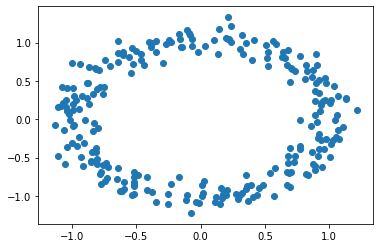

In [7]:
# Plot data points around the outer circle (y=0)

# Using manual filtering
all_data0 = [pt for idx, pt in enumerate(X) if y[idx]==0]
all_data0_x = [pt[0] for pt in all_data0]
all_data0_y = [pt[1] for pt in all_data0]
plt.scatter(all_data0_x, all_data0_y)

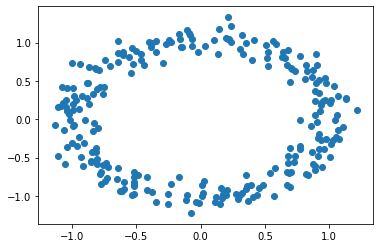

In [8]:
# Using numpy filter
plt.scatter(X[y==0, 0], X[y==0, 1])

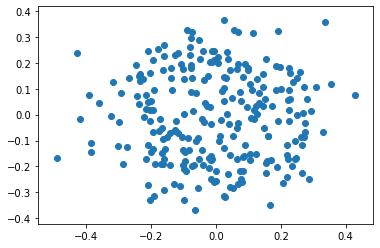

In [9]:
# Plot data points around the inner circle (y=1)

# Using manual filtering
all_data1 = [pt for idx, pt in enumerate(X) if y[idx]==1]
all_data1_x = [pt[0] for pt in all_data1]
all_data1_y = [pt[1] for pt in all_data1]
plt.scatter(all_data1_x, all_data1_y)

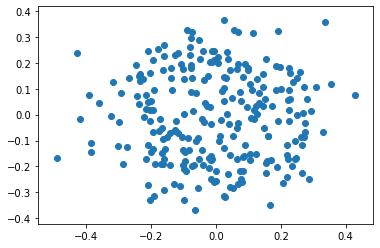

In [10]:
# Using numpy filter
plt.scatter(X[y==1, 0], X[y==1, 1])

In [0]:
# Wrap plotting the data into a function
def plot_data():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

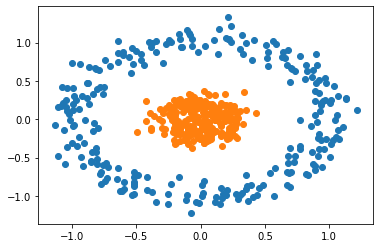

In [12]:
plot_data()

# Create the Neural Network Model

This should be similar to the simulated model from the tutorial:  
[DeepNeuralNetworks-5-Backpropagation-2.png](
https://github.com/ginomempin/machine-learning-tutorials/blob/master/docs/DeepNeuralNetworks/DeepNeuralNetworks-5-Backpropagation-2.png)

In [0]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super().__init__()
        self._linear1 = nn.Linear(input_size, hidden_layer_size)
        self._linear2 = nn.Linear(hidden_layer_size, output_size)
    def forward(self, x):
        result = torch.sigmoid(self._linear1(x))
        result = torch.sigmoid(self._linear2(result))
        return result
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return "1, inner"
        else:
            return "0, outer"

In [15]:
# Set a fixed seed to get reproducible results with tutorial]
# In reality, use any seed.
torch.manual_seed(2)

model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


# Training

## Convert Dataset to Tensors

In [0]:
x_data = torch.Tensor(X)
y_labels = torch.Tensor(y.reshape(500, 1))  # To satisfy Torch warning 
                                            # """
                                            #  UserWarning: Using a target size (torch.Size([500])) 
                                            #  that is different to the input size (torch.Size([500, 1]))
                                            # """

## Define the Loss and Optimizer Functions

In [0]:
# Use Cross Entropy to compute the loss.
# Specifically, Binary Cross Entropy Loss.
criterion = nn.BCELoss()

# Use Gradient Descent to optimize the model.
# Specifically, the Adam optimizer (Adaptive Method Algorithms).
# The Adam optimizer is a combination of 2 extensions of SGD (Stochastic Gradient Descent):
#   Adagrad
#   RMSprop
# What distinguishes it from the SGD is that we had to be careful in choosing the proper
# the learning rate. Too small leads to very slow convergence towards minimum error/loss, 
# while too large can hinder the convergence. When using Adam optimization, it computes 
# the adaptive learning rates for EACH parameter. In practice, Adam is recommended as the
# default optimization algorithm.
optimizer = torch.optim.Adam (
    model.parameters(),
    lr=0.1  # Adjust based on the plot of loss over time
            # If it starts to lag at some point, increase it
)

## Forward-Backward for N epochs

In [22]:
# Set the number of passes, where on each pass, we will make a prediction, calculate the loss, 
# take the gradient(the derivative) of the loss, then subtract the current gradient from the 
# current weight. This has to be done iteratively until the loss approaches zero.
#
# This is the same set of steps as described in the tutorial:
#  https://github.com/ginomempin/machine-learning-tutorials/blob/master/docs/DeepNeuralNetworks.md#error-function
epochs = 1000

losses = []
for i in range(epochs):
    y_pred = model.forward(torch.Tensor(x_data))

    loss = criterion(y_pred, torch.Tensor(y_labels))
    losses.append(loss)
    print("epoch {}: loss={}".format(i, loss.item()))
    
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

epoch 0: loss=0.03219418600201607
epoch 1: loss=0.030535541474819183
epoch 2: loss=0.029004240408539772
epoch 3: loss=0.027608318254351616
epoch 4: loss=0.026248479261994362
epoch 5: loss=0.024970540776848793
epoch 6: loss=0.02376616559922695
epoch 7: loss=0.022605011239647865
epoch 8: loss=0.0215225238353014
epoch 9: loss=0.02052159607410431
epoch 10: loss=0.01957591064274311
epoch 11: loss=0.01868094690144062
epoch 12: loss=0.01784343458712101
epoch 13: loss=0.01705523021519184
epoch 14: loss=0.016307085752487183
epoch 15: loss=0.015602752566337585
epoch 16: loss=0.014944711700081825
epoch 17: loss=0.01432651374489069
epoch 18: loss=0.01374280359596014
epoch 19: loss=0.013193631544709206
epoch 20: loss=0.012678015045821667
epoch 21: loss=0.012191248126327991
epoch 22: loss=0.011729706078767776
epoch 23: loss=0.011293437331914902
epoch 24: loss=0.010882902890443802
epoch 25: loss=0.010496178641915321
epoch 26: loss=0.010130527429282665
epoch 27: loss=0.009784486144781113
epoch 28: los

## Plot the Loss 

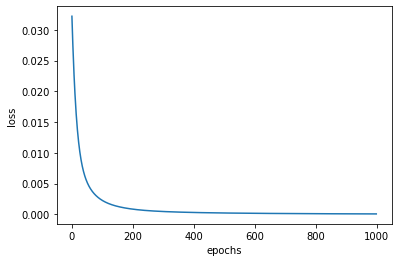

In [23]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(range(epochs), losses)

# Testing

In [53]:
# What is meshgrid?
# It creates 2 Cartesian grids, one with all the possible x-values
# for the x-axis arranged in rows and one with all the possible 
# y-values arranged in columns.

tmp_a = np.arange(1, 4)
print(tmp_a)

tmp_b = np.arange(5, 8)
print(tmp_b)

tmp_aaa, tmp_bbb = np.meshgrid(tmp_a, tmp_b)
print(tmp_aaa)
print(tmp_bbb)

[1 2 3]
[5 6 7]
[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[5 5 5]
 [6 6 6]
 [7 7 7]]


In [0]:
# Creates a countour plot showing the decision boundary
# We call it "decision boundary", because of the model
# deciding if the point belongs in the outer circle (y=0)
# or in the inner circle (y=1). So the "boundary" here
# refers to the boundary between the 2 circles.
def plot_decision_boundary(training_data, labels, debug=False):
    t = 0.25  # tolerance, just to space out the range for better display
    x_span = np.linspace(min(X[:, 0]) - t, max(X[:, 0]) + t)
    y_span = np.linspace(min(X[:, 1]) - t, max(X[:, 1]) + t)

    if debug:
        print("x_span\n", x_span)
        print("x_span.shape\n", x_span.shape)
        print("y_span\n", y_span)
        print("y_span.shape\n", y_span.shape)    

    xx, yy = np.meshgrid(x_span, y_span) 
    # meshgrid does the following:
    #   Takes x_span (50x1) and creates a 2d vector (50x50)
    #       where each row is a copy of the row from x_span
    #   Takes y_span (50x1) and creates a 2d vector (50x50)
    #       where each col is a copy of the row from y_span
    # The result are 2 50x50 cartesian grids, one with all 
    # the possible x-values for the x-axis arranged in rows,
    # and one with all the possible y-values arranged in columns.

    if debug:
        print("xx\n", xx)
        print("xx.shape\n", xx.shape)
        print("yy\n", yy)
        print("yy.shape\n", yy.shape)

    # Combine xx and yy into 1 50x50 grid.
    # Use ravel() to flatten 2D to 1D then concatenate.
    # Finally, convert to Tensors.
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    # Pass the data set to the model
    pred_func = model.forward(grid)

    # Plot the predictions.
    # Use contourf to plot distinct countour zones, where each 
    # zone represents distinct probabilities. The zones nearing 
    # the outer circle (becoming purplish shade) represent the 
    # probability that it belongs to y=0 zone, while the zones 
    # nearing the inner circle (becoming yellowish shade) mean
    # probability that it belongs to y=1 zone.
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

x_span
 [-1.38339265 -1.32525592 -1.26711919 -1.20898246 -1.15084573 -1.092709
 -1.03457227 -0.97643554 -0.91829881 -0.86016208 -0.80202536 -0.74388863
 -0.6857519  -0.62761517 -0.56947844 -0.51134171 -0.45320498 -0.39506825
 -0.33693152 -0.27879479 -0.22065806 -0.16252133 -0.1043846  -0.04624787
  0.01188886  0.07002559  0.12816232  0.18629905  0.24443578  0.30257251
  0.36070923  0.41884596  0.47698269  0.53511942  0.59325615  0.65139288
  0.70952961  0.76766634  0.82580307  0.8839398   0.94207653  1.00021326
  1.05834999  1.11648672  1.17462345  1.23276018  1.29089691  1.34903364
  1.40717037  1.46530709]
x_span.shape
 (50,)
y_span
 [-1.47178655 -1.4095299  -1.34727324 -1.28501658 -1.22275992 -1.16050327
 -1.09824661 -1.03598995 -0.97373329 -0.91147664 -0.84921998 -0.78696332
 -0.72470667 -0.66245001 -0.60019335 -0.53793669 -0.47568004 -0.41342338
 -0.35116672 -0.28891006 -0.22665341 -0.16439675 -0.10214009 -0.03988344
  0.02237322  0.08462988  0.14688654  0.20914319  0.27139985  0.

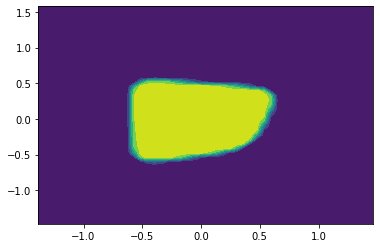

In [71]:
plot_decision_boundary(X, y, debug=True) 
plot_data() 

Prediction is 1, lower right


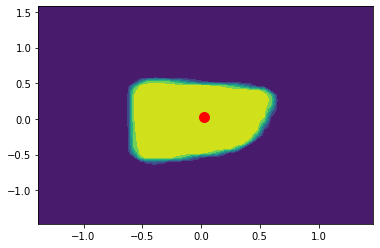

In [72]:
# Test Point 1 
# Expect to be in the positive region (inner circle)
x = 0.025
y = 0.025
point = torch.Tensor([x, y])

pred = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is " + pred)
plot_decision_boundary(X, y) 